# <h1 style="color:red; text-align:center;font-size:3rem">SPATIAL PLOT ANALYSIS FOR ALGERIA &#128512;  </h1>

# IMPORTING PYTHON LIBRARIES

In [98]:
import netCDF4 as nc
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
import glob
import xarray as xr

In [99]:
Algeria_dataset=xr.open_dataset('Algeria.nc')

# NULL CORRECTION

In [100]:
Algeria_precip1=Algeria_dataset['precip']
Algeria_precip1=Algeria_precip1.where(Algeria_precip1 !=-99.0)
Algeria_precip1

<xarray.DataArray 'precip' (datetime: 3652, lat: 75, lon: 84)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 -8.75 -8.5 -8.25 -8.0 ... 11.25 11.5 11.75 12.0
  * lat       (lat) float32 37.5 37.25 37.0 36.75 36.5 ... 19.75 19.5 19.25 19.0
Attributes:
    grid_mapping:  crs

In [101]:
#Yearly dry days for precipitation <1mm 
ds = Algeria_precip1
dry_days_per_year = (ds < 1).groupby('datetime.year').sum(dim='datetime')


In [102]:
dry_days_per_year

<xarray.DataArray 'precip' (year: 10, lat: 75, lon: 84)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 -8.75 -8.5 -8.25 -8.0 -7.75 ... 11.25 11.5 11.75 12.0
  * lat      (lat) float32 37.5 37.25 37.0 36.75 36.5 ... 19.75 19.5 19.25 19.0
  * year     (year) int64 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010

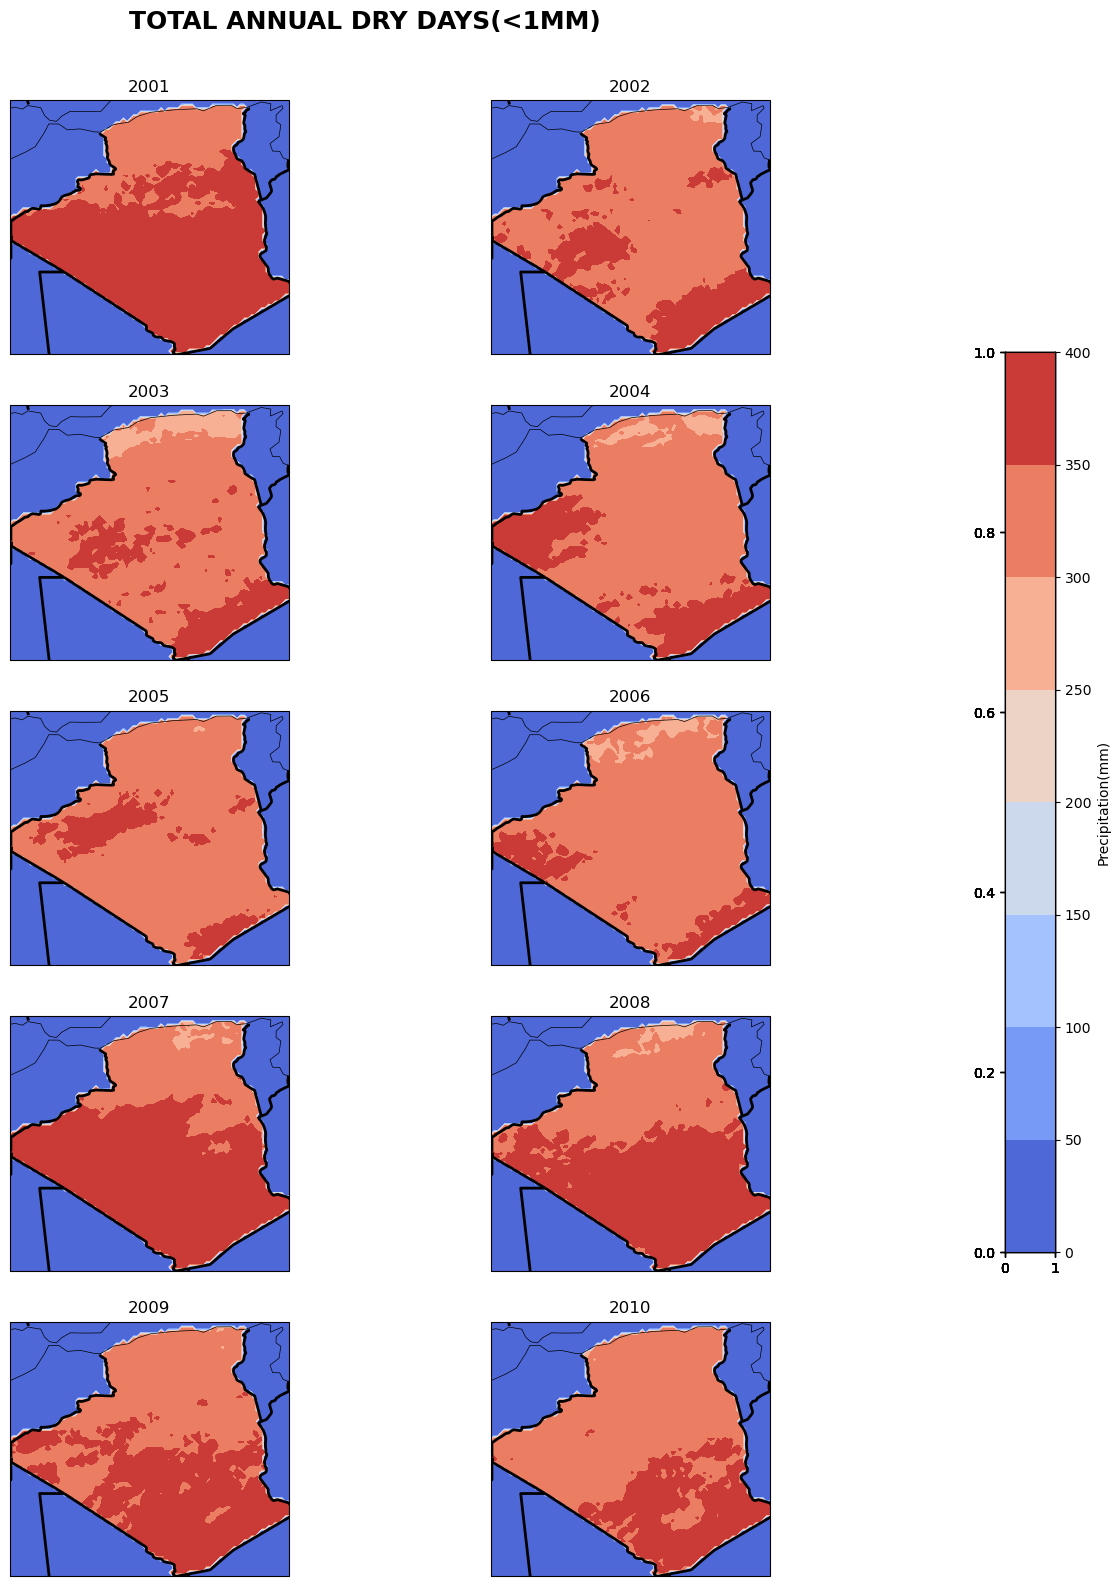

In [103]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-8.75, 11.5, 19.,37.5], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(dry_days_per_year.lon,dry_days_per_year.lat,dry_days_per_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL DRY DAYS(<1MM)', fontweight='bold',fontsize=18);
plt.savefig('TOTAL ANNUAL DRY DAYS(<1MM).png');


In [104]:

ds = Algeria_precip1
wet_days_per_year = (ds >= 1).groupby('datetime.year').sum(dim='datetime')

In [105]:
wet_days_per_year

<xarray.DataArray 'precip' (year: 10, lat: 75, lon: 84)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 -8.75 -8.5 -8.25 -8.0 -7.75 ... 11.25 11.5 11.75 12.0
  * lat      (lat) float32 37.5 37.25 37.0 36.75 36.5 ... 19.75 19.5 19.25 19.0
  * year     (year) int64 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010

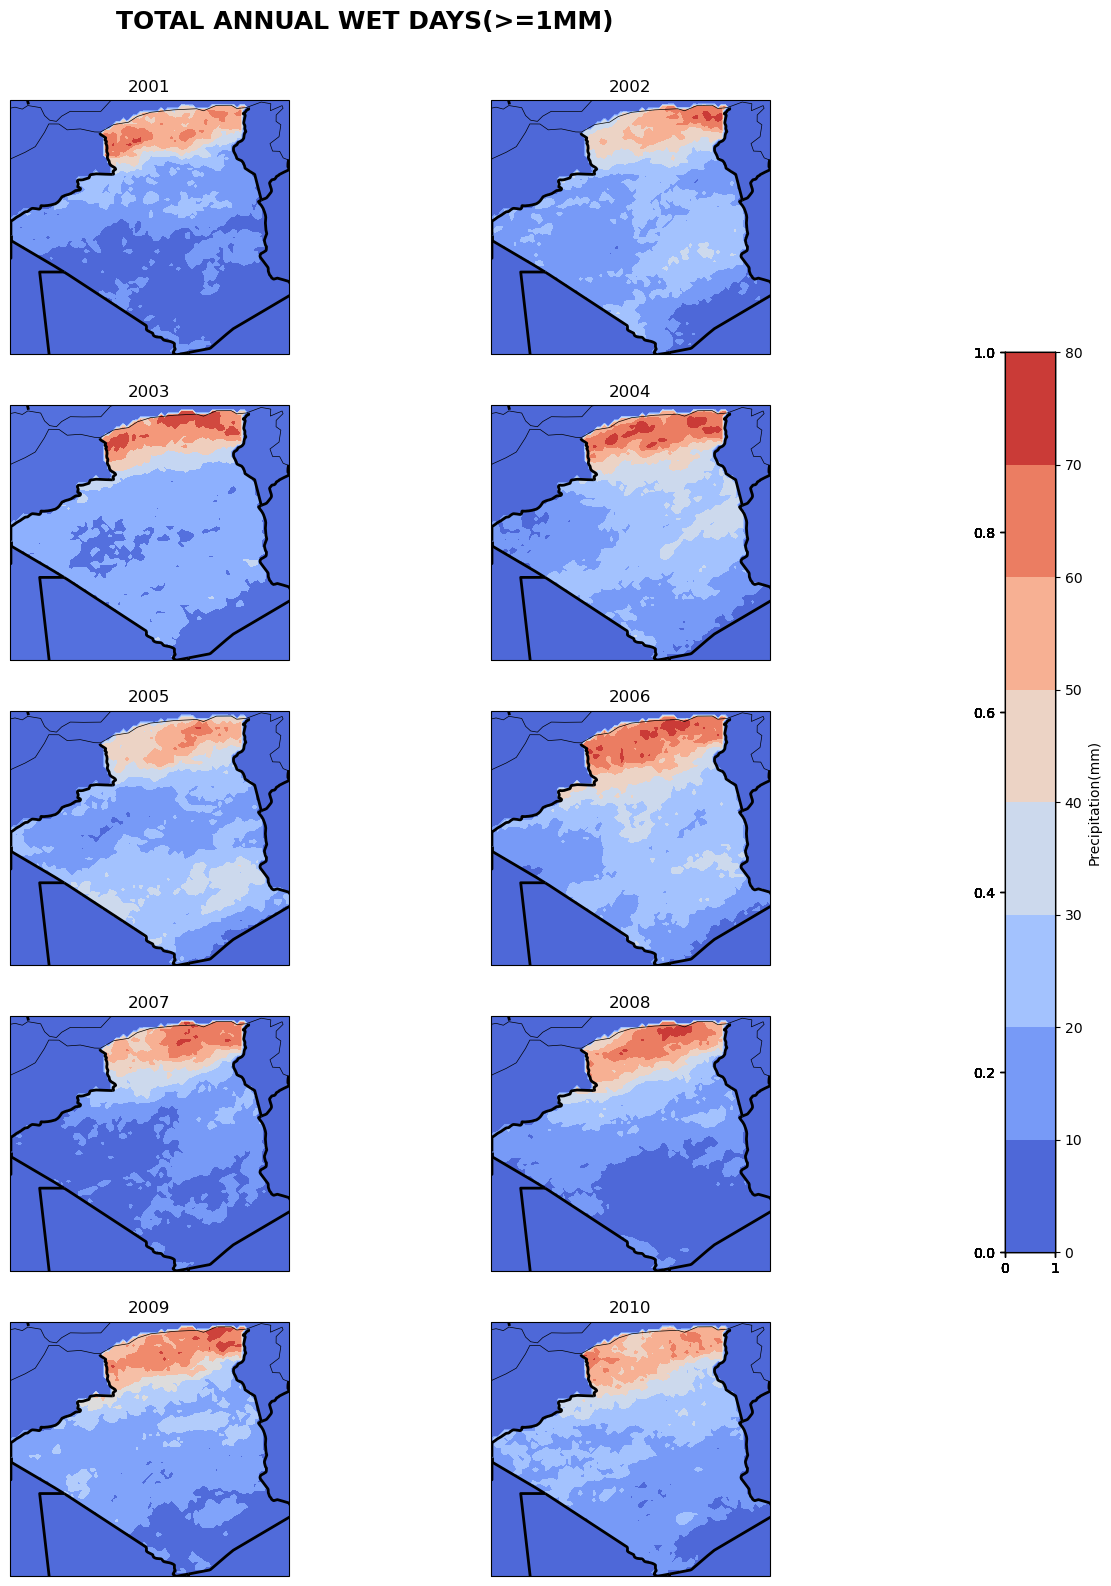

In [106]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-8.75, 11.5, 19.,37.5], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_year.lon,wet_days_per_year.lat,wet_days_per_year[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL WET DAYS(>=1MM)', fontweight='bold',fontsize=18);
plt.savefig('TOTAL ANNUAL WET DAYS(>=1MM).png');

In [107]:
wet_days_per_year1 = (ds>10).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year1

<xarray.DataArray 'precip' (year: 10, lat: 75, lon: 84)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 -8.75 -8.5 -8.25 -8.0 -7.75 ... 11.25 11.5 11.75 12.0
  * lat      (lat) float32 37.5 37.25 37.0 36.75 36.5 ... 19.75 19.5 19.25 19.0
  * year     (year) int64 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010

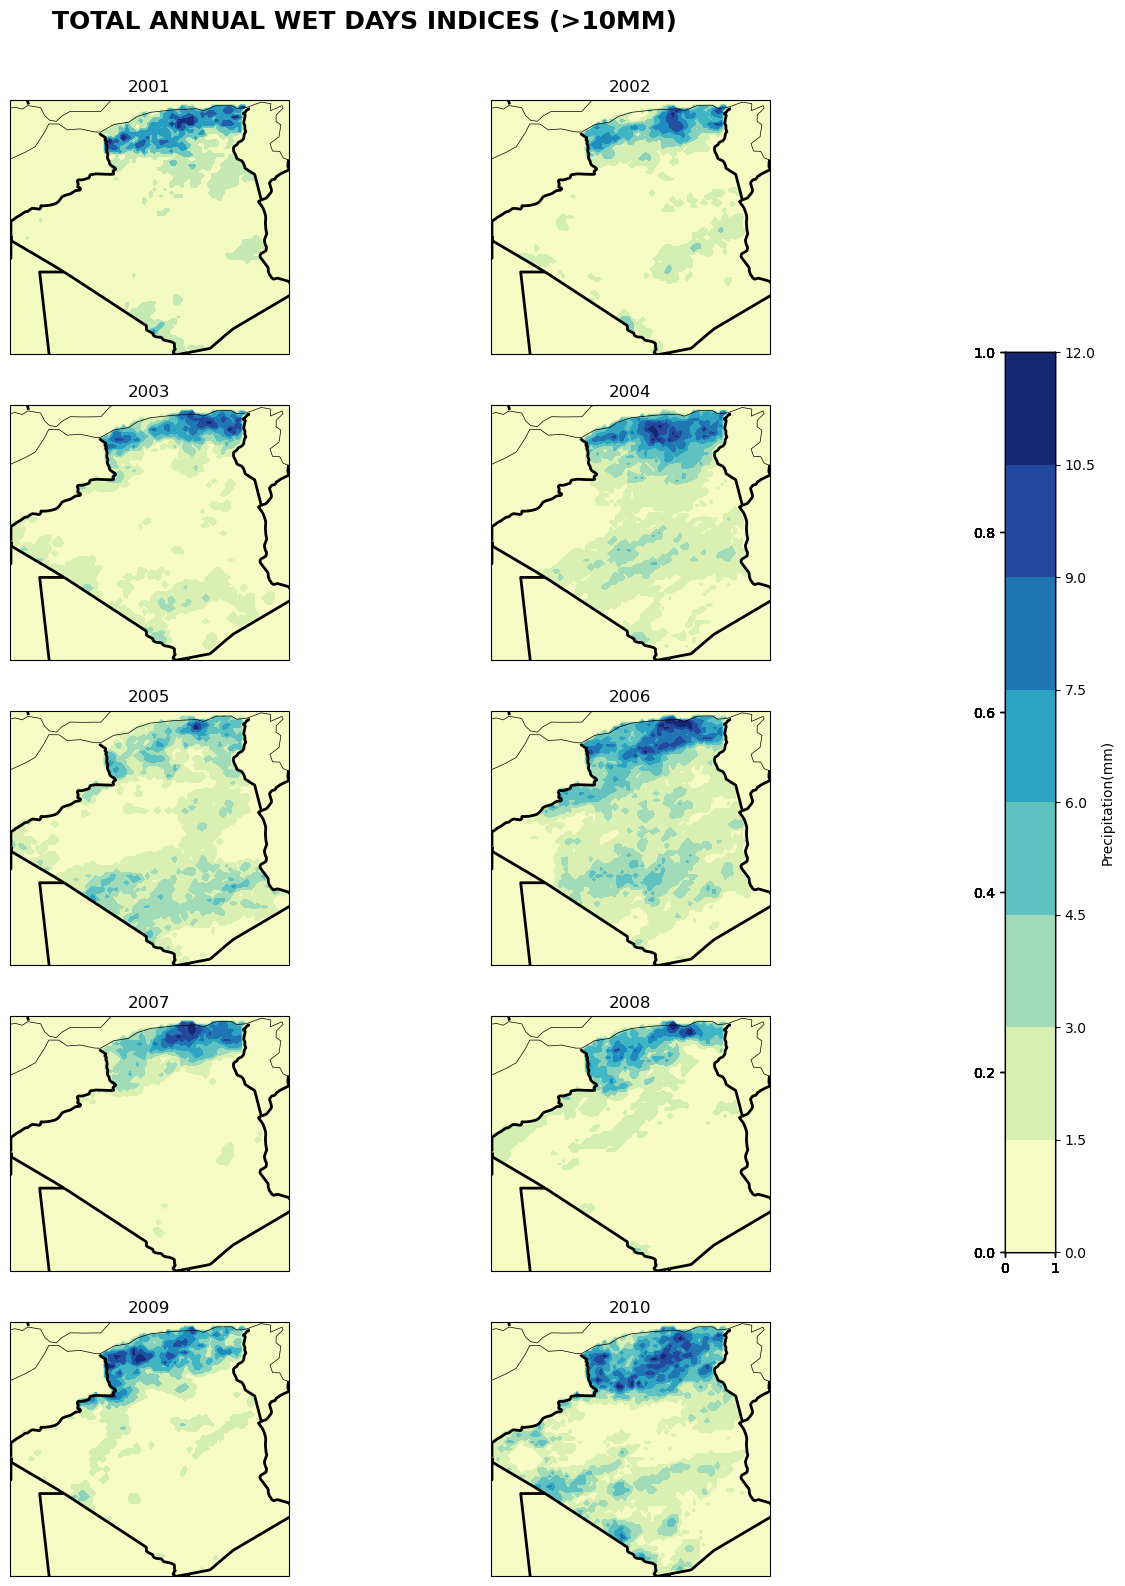

In [108]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-8.75, 11.5, 19.,37.5], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_year1.lon,wet_days_per_year1.lat,wet_days_per_year1[i],
                       cmap='YlGnBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL WET DAYS INDICES (>10MM)', fontweight='bold',fontsize=18);
plt.savefig('TOTAL ANNUAL WET DAYS INDICES (>10MM).png');

In [109]:
wet_days_per_year2 = (ds>20).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year2

<xarray.DataArray 'precip' (year: 10, lat: 75, lon: 84)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 -8.75 -8.5 -8.25 -8.0 -7.75 ... 11.25 11.5 11.75 12.0
  * lat      (lat) float32 37.5 37.25 37.0 36.75 36.5 ... 19.75 19.5 19.25 19.0
  * year     (year) int64 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010

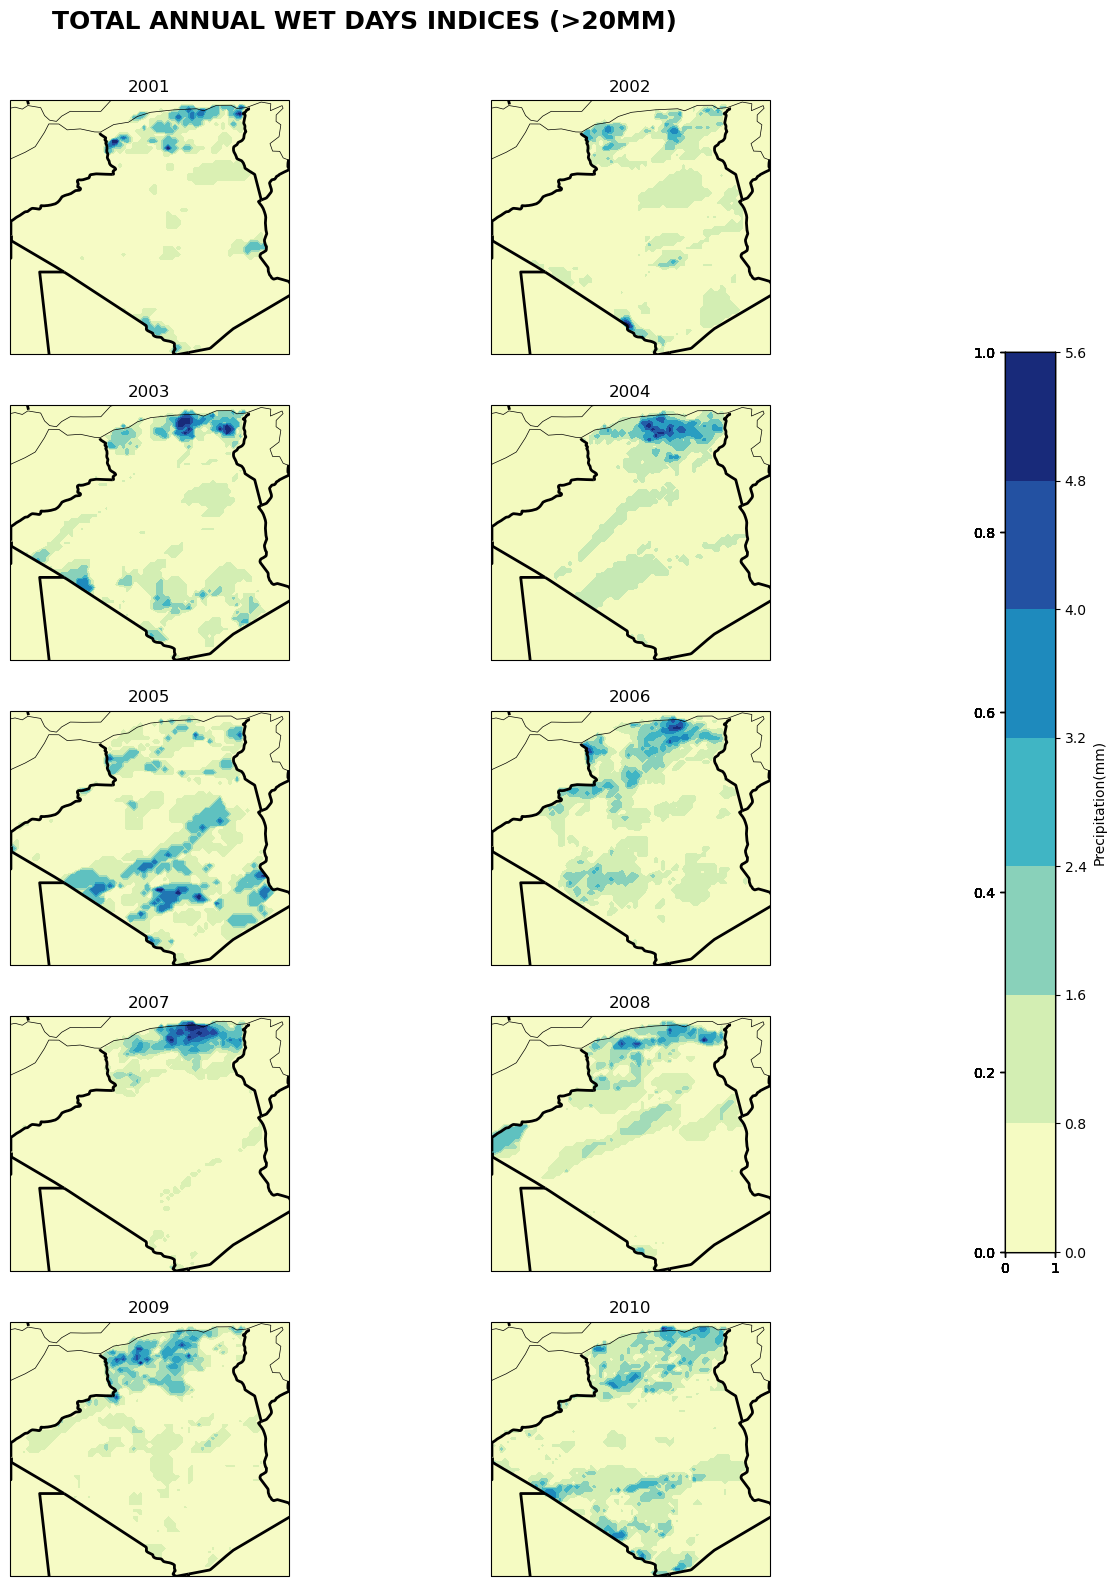

In [110]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
year_names=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-8.75, 11.5, 19.,37.5], crs=ccrs.PlateCarree())
    ax[i].set_title(year_names[i])
    cb= ax[i].contourf(wet_days_per_year2.lon,wet_days_per_year2.lat,wet_days_per_year2[i],
                       cmap='YlGnBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL WET DAYS INDICES (>20MM)', fontweight='bold',fontsize=18);
plt.savefig('TOTAL ANNUAL WET DAYS INDICES(>20MM).png');

In [111]:
wet_days_per_month1= (ds>=1).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month1

<xarray.DataArray 'precip' (month: 12, lat: 75, lon: 84)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 -8.75 -8.5 -8.25 -8.0 -7.75 ... 11.25 11.5 11.75 12.0
  * lat      (lat) float32 37.5 37.25 37.0 36.75 36.5 ... 19.75 19.5 19.25 19.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

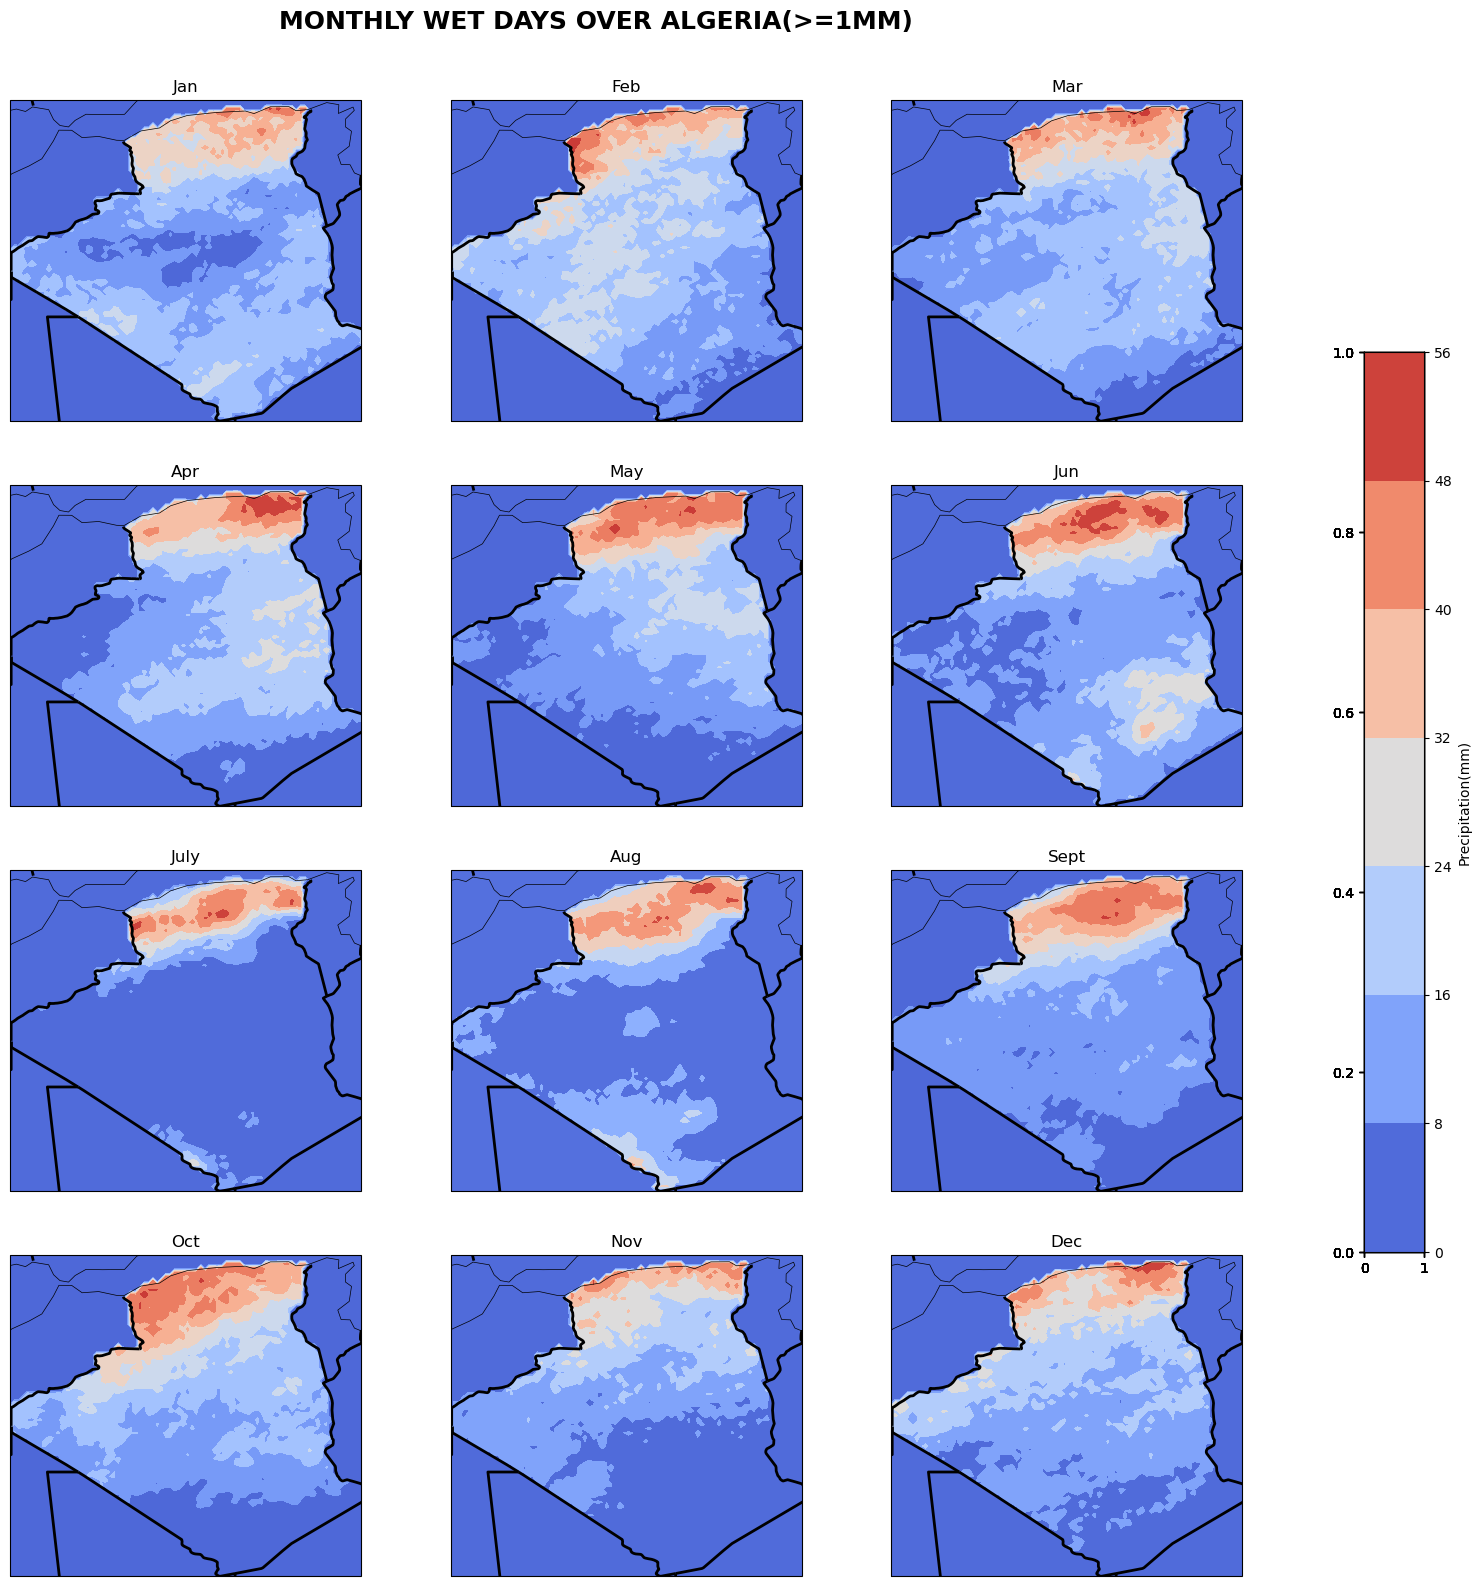

In [112]:
fig,ax=plt.subplots(4,3,figsize=(24,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    #ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-8.75, 11.5, 19.,37.5], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_month1.lon,wet_days_per_month1.lat,wet_days_per_month1[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY WET DAYS OVER ALGERIA(>=1MM)', fontweight='bold',fontsize=18);
plt.savefig('TOTAL ANNUAL WET DAYS INDICES(>=1MM).png');

In [113]:
dry_days_per_month2= (ds<=1).groupby('datetime.month').sum(dim='datetime')
dry_days_per_month2

<xarray.DataArray 'precip' (month: 12, lat: 75, lon: 84)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 -8.75 -8.5 -8.25 -8.0 -7.75 ... 11.25 11.5 11.75 12.0
  * lat      (lat) float32 37.5 37.25 37.0 36.75 36.5 ... 19.75 19.5 19.25 19.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

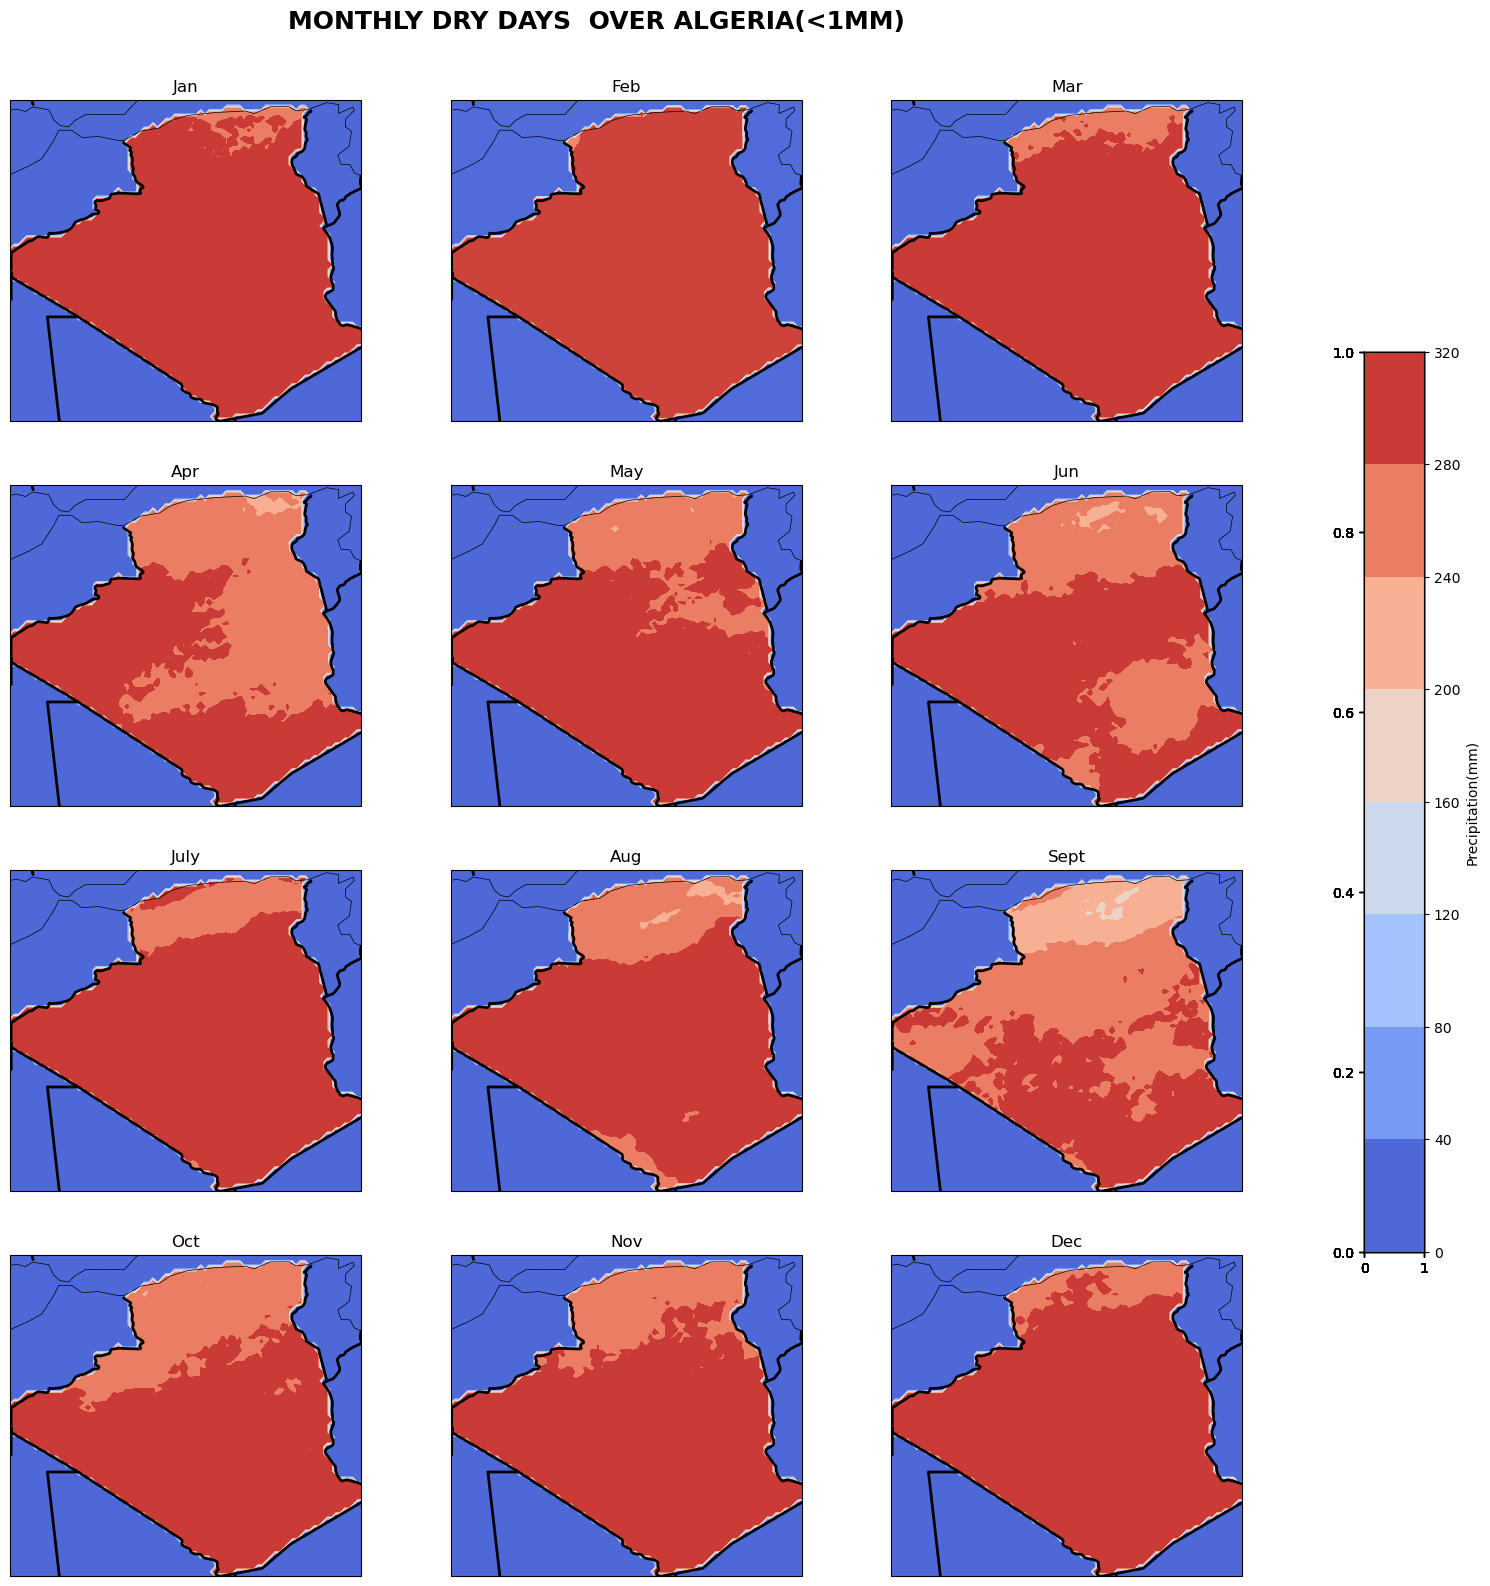

In [114]:
fig,ax=plt.subplots(4,3,figsize=(24,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    #ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-8.75, 11.5, 19.,37.5], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(dry_days_per_month2.lon,dry_days_per_month2.lat,dry_days_per_month2[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY DRY DAYS  OVER ALGERIA(<1MM)',fontweight='bold',fontsize=18);
plt.savefig(' MONTHLY DRY DAYS  OVER ALGERIA(<1MM).png');

In [115]:
wet_days_per_month2= (ds>10).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month2

<xarray.DataArray 'precip' (month: 12, lat: 75, lon: 84)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 -8.75 -8.5 -8.25 -8.0 -7.75 ... 11.25 11.5 11.75 12.0
  * lat      (lat) float32 37.5 37.25 37.0 36.75 36.5 ... 19.75 19.5 19.25 19.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

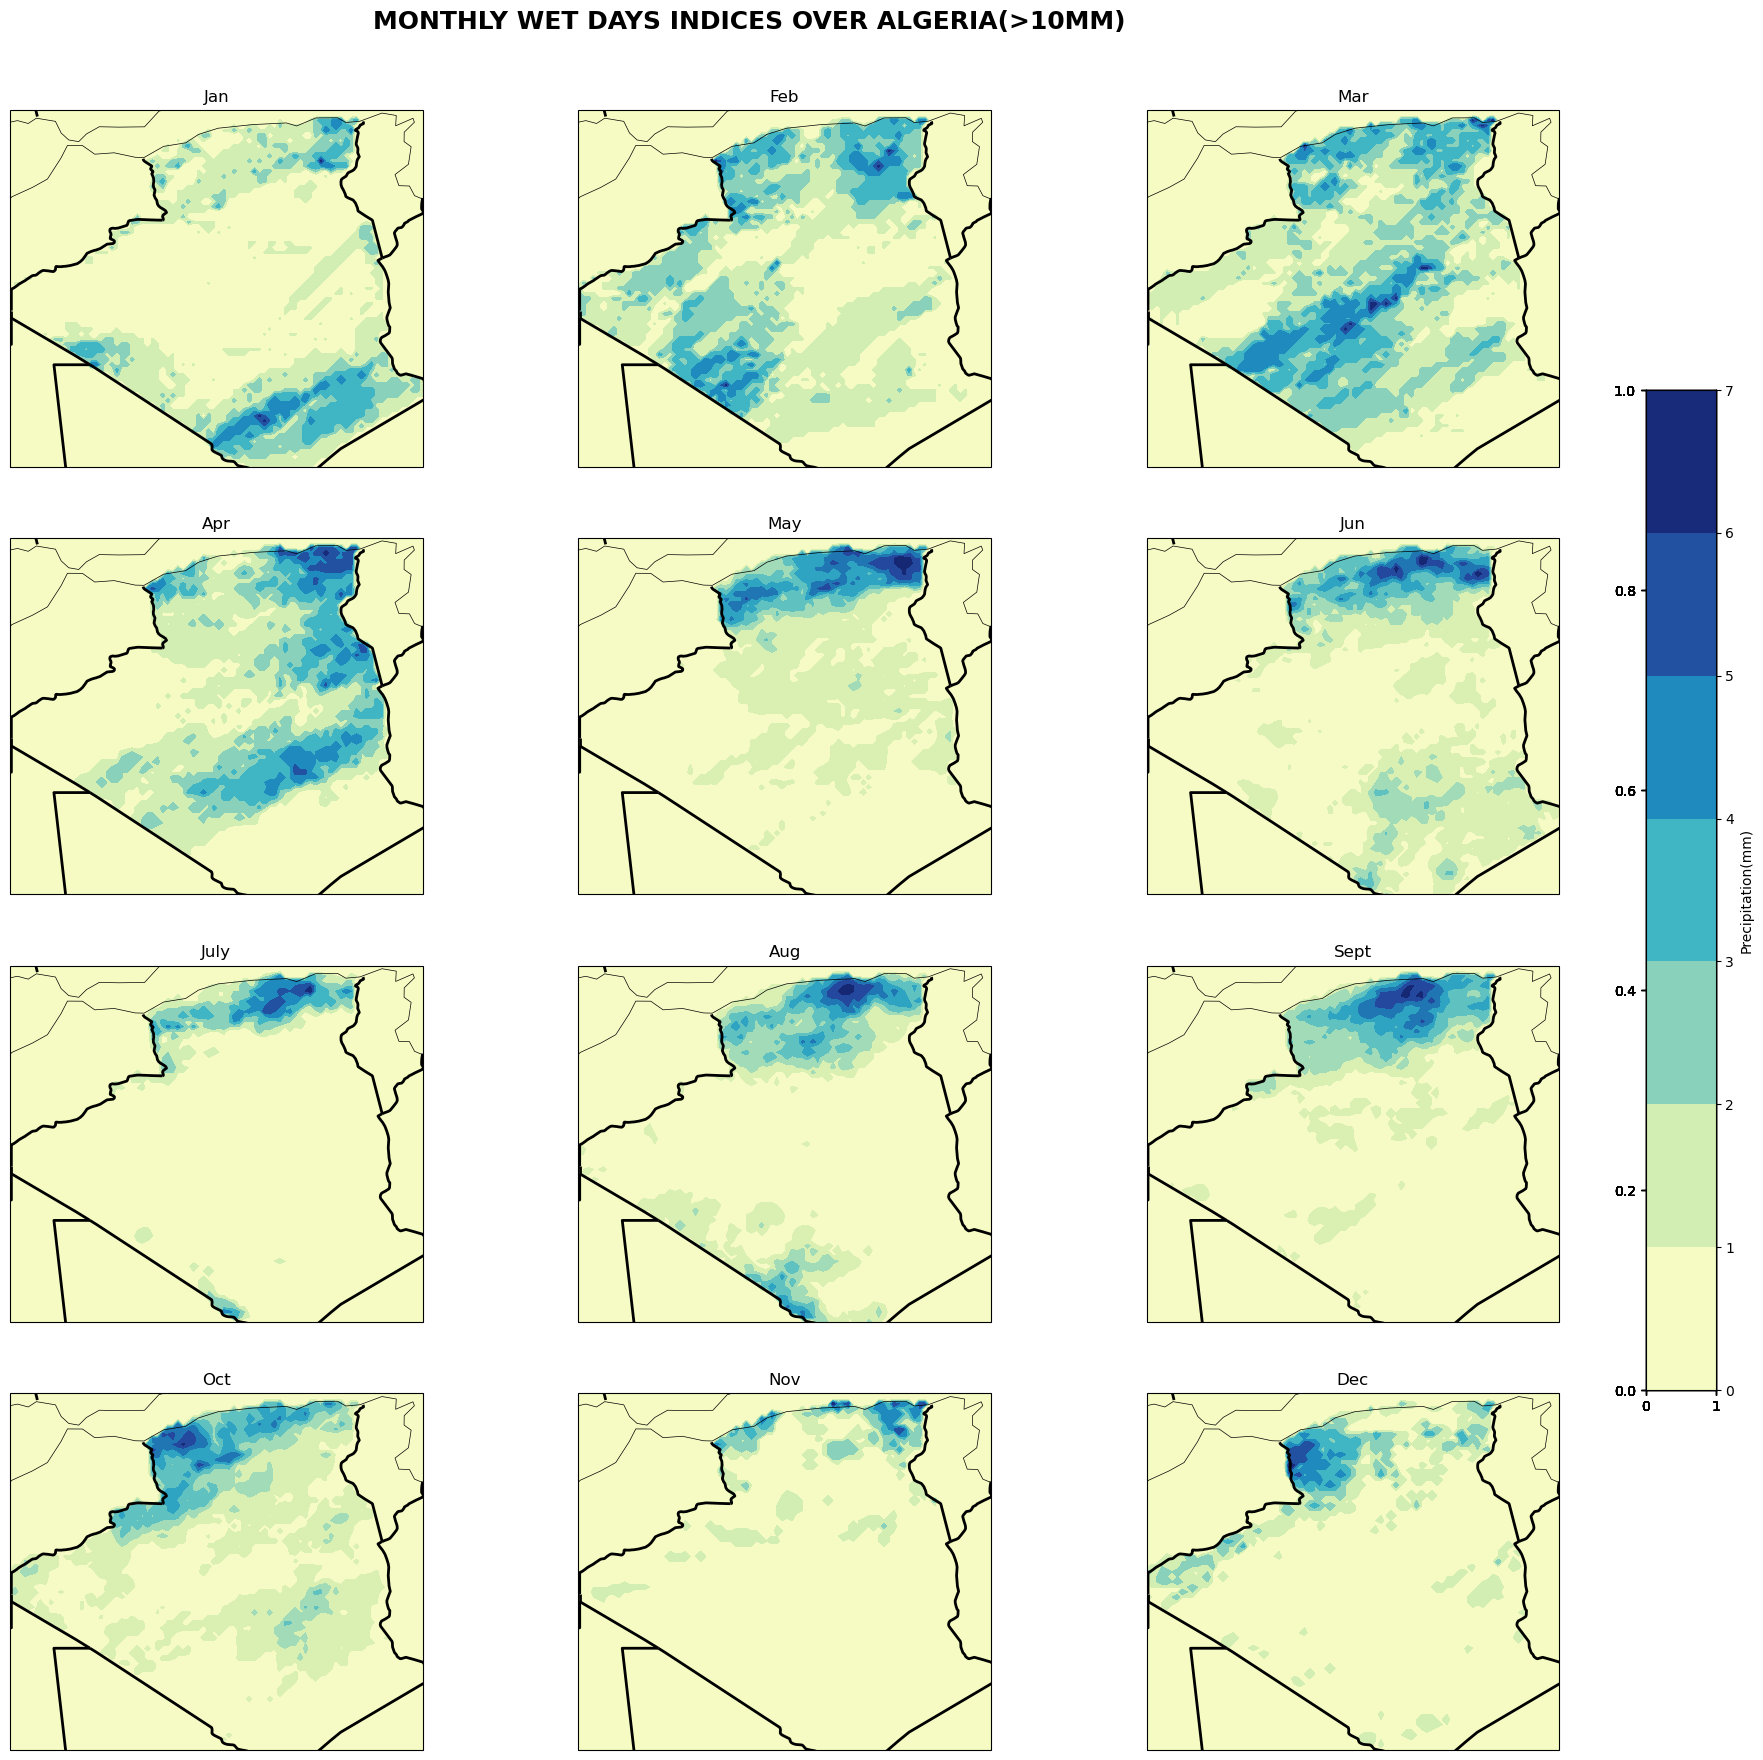

In [116]:
fig,ax=plt.subplots(4,3,figsize=(28,20),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    #ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-8.75, 11.5, 20.0,37.5], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_month2.lon,wet_days_per_month2.lat,wet_days_per_month2[i],
                       cmap='YlGnBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.45, top=0.93)
plt.suptitle('MONTHLY WET DAYS INDICES OVER ALGERIA(>10MM)', fontweight='bold',fontsize=18);
plt.savefig('MONTHLY WET DAYS INDICES OVER ALGERIA(>10MM).png');

In [117]:
wet_days_per_month3= (ds>20).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month3

<xarray.DataArray 'precip' (month: 12, lat: 75, lon: 84)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 -8.75 -8.5 -8.25 -8.0 -7.75 ... 11.25 11.5 11.75 12.0
  * lat      (lat) float32 37.5 37.25 37.0 36.75 36.5 ... 19.75 19.5 19.25 19.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

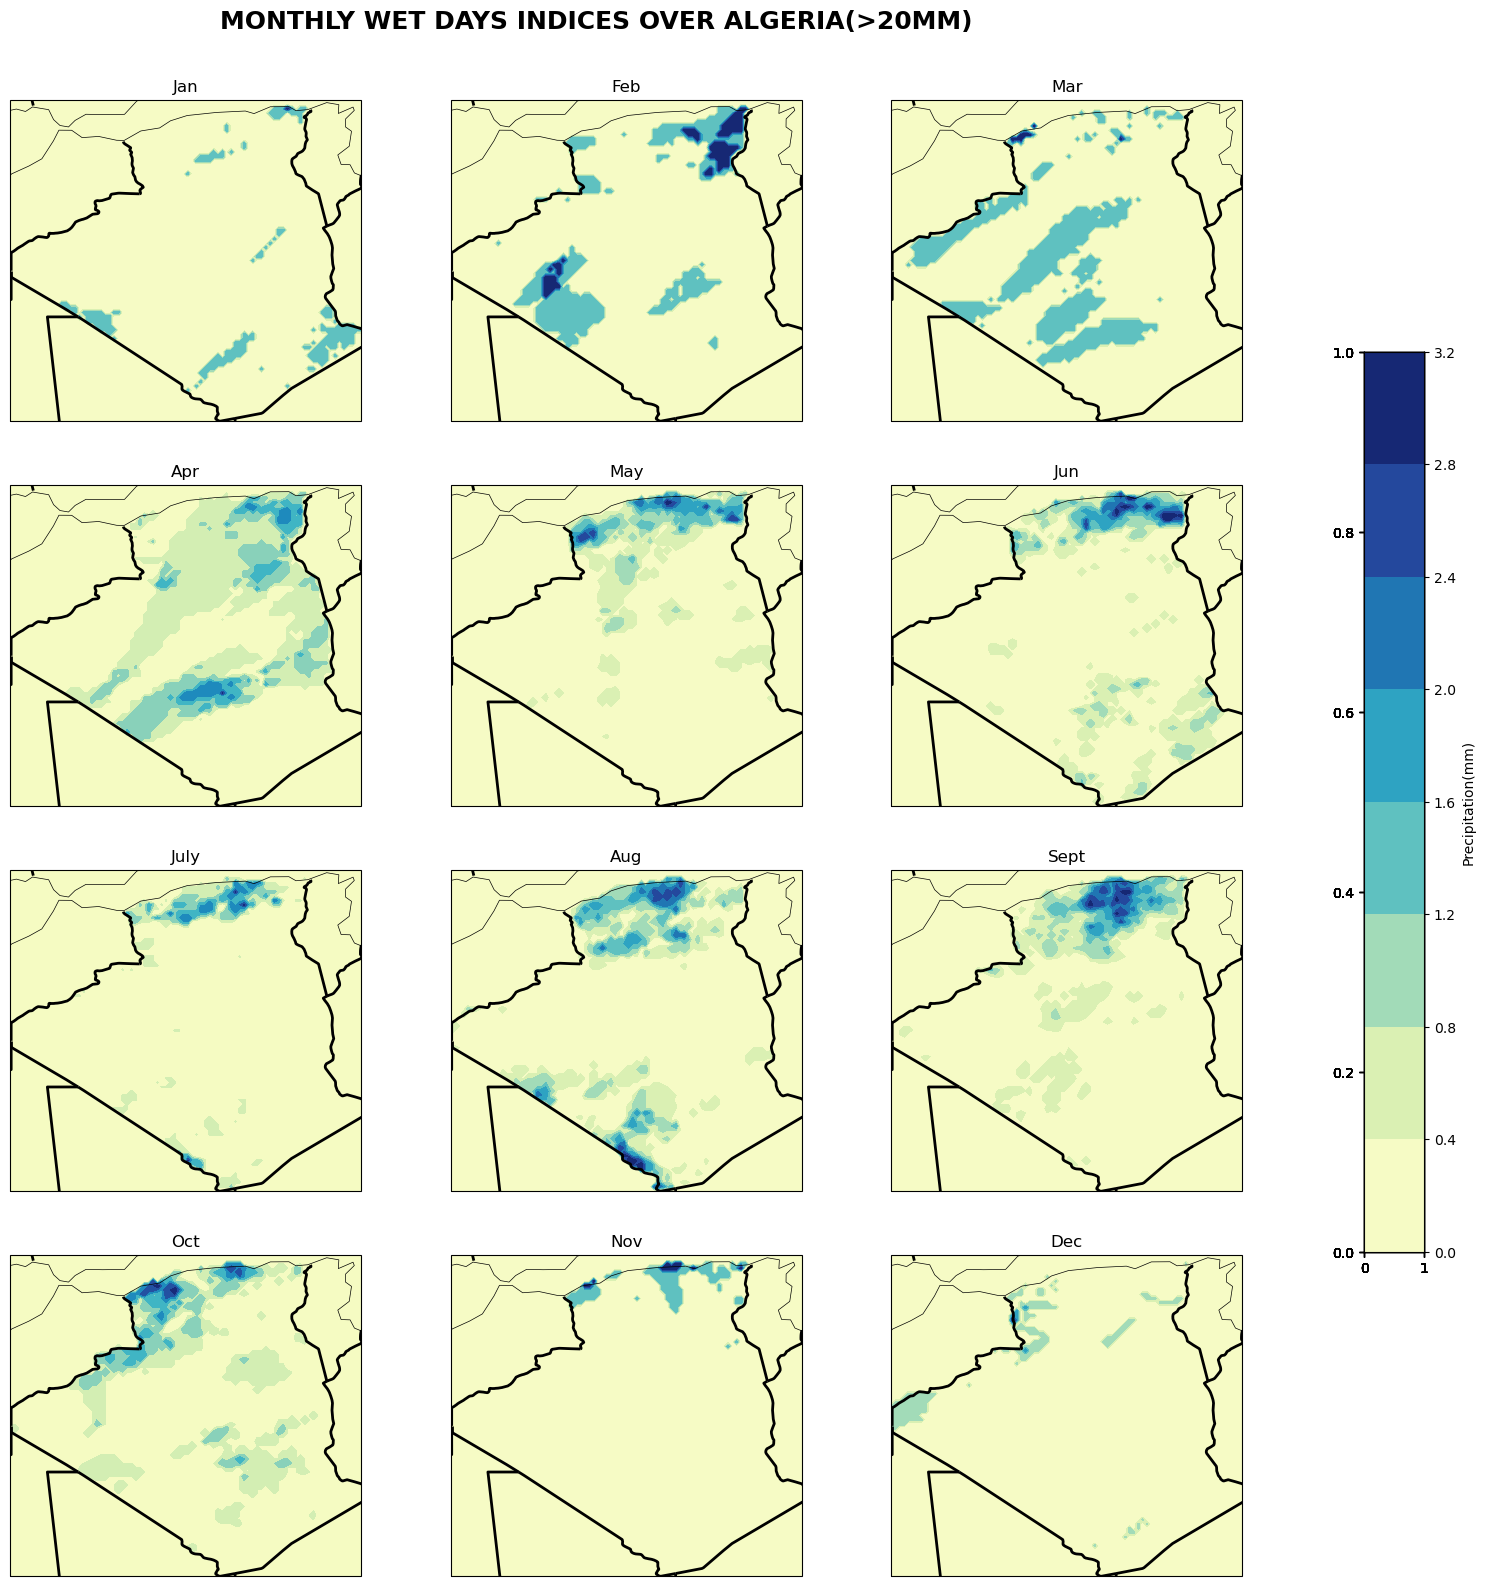

In [118]:
fig,ax=plt.subplots(4,3,figsize=(24,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    #ax[i].add_feature(cfeature.STATES)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-8.75, 11.5, 19.,37.5], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_month3.lon,wet_days_per_month3.lat,wet_days_per_month3[i],
                       cmap='YlGnBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY WET DAYS INDICES OVER ALGERIA(>20MM)', fontweight='bold',fontsize=18);
plt.savefig('TOTAL MONTHLY WET DAYS INDICES(>20MM).png');

# <h1 style="color:red; text-align:center;font-size:3rem">END OF CODE  || @DREW &#128525;</h1>